In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#aqui estamos criando uma cópia do csv em data, e limpando ela de linhas sem informações e de nomes repetidos em minuscúlo/maiúsculo
#transformando todos em maiúsculo

df = pd.read_csv('car_prices.csv')
data = df.copy()
data = data.dropna()
data['body'] = [nome.upper() for nome in data['body']]

In [29]:
data

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,SEDAN,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,SEDAN,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,SEDAN,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,BMW,5 Series,528i,SEDAN,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,CREW CAB,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,SEDAN,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [30]:
#Limpando as colunas que não terão utilidade para análise

data = data.drop(["trim", "transmission", "vin", "state", "condition", "odometer", "seller", "interior", "mmr"], axis = 1)

In [31]:
data

,year,make,model,body,color,sellingprice,saledate
0,2015,Kia,Sorento,SUV,white,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,SUV,white,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,SEDAN,gray,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,SEDAN,white,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,SEDAN,gray,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...
558831,2011,BMW,5 Series,SEDAN,white,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558833,2012,Ram,2500,CREW CAB,white,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,SUV,black,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,SEDAN,white,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [32]:
#Filtrando a lista para somente carros de 2010 e colocando em uma nova lista "carros_2010"

carros_2010 = data.loc[lambda dados: dados["year"] == 2010]
carros_2010

,year,make,model,body,color,sellingprice,saledate
2465,2010,Chevrolet,Aveo,SEDAN,red,5900.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
2467,2010,Dodge,Challenger,COUPE,black,10500.0,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
2474,2010,Chevrolet,Tahoe,SUV,white,16250.0,Wed Dec 17 2014 11:00:00 GMT-0800 (PST)
2486,2010,Chevrolet,Equinox,SUV,gray,10700.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
2493,2010,Chevrolet,Equinox,SUV,beige,12500.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...
558689,2010,Chevrolet,Silverado 2500HD,CREW CAB,red,17000.0,Fri Jun 19 2015 02:00:00 GMT-0700 (PDT)
558691,2010,Mazda,Mazda6,SEDAN,white,9400.0,Fri Jun 19 2015 02:45:00 GMT-0700 (PDT)
558793,2010,Cadillac,Escalade ESV,SUV,black,29000.0,Tue Jul 07 2015 07:00:00 GMT-0700 (PDT)
558801,2010,Mercury,Mariner,SUV,white,8700.0,Wed Jul 08 2015 07:15:00 GMT-0700 (PDT)


In [33]:
#Contando quantas vendas de cada carro foram feitas, usando a coluna make (fabricante) como parâmetro

num_vendidos = dict(carros_2010.value_counts("make").head())
num_vendidos.items()

dict_items([('Ford', np.int64(3534)), ('Chevrolet', np.int64(3347)), ('Dodge', np.int64(2421)), ('Toyota', np.int64(1991)), ('Honda', np.int64(1313))])

(0.0, 6000.0)

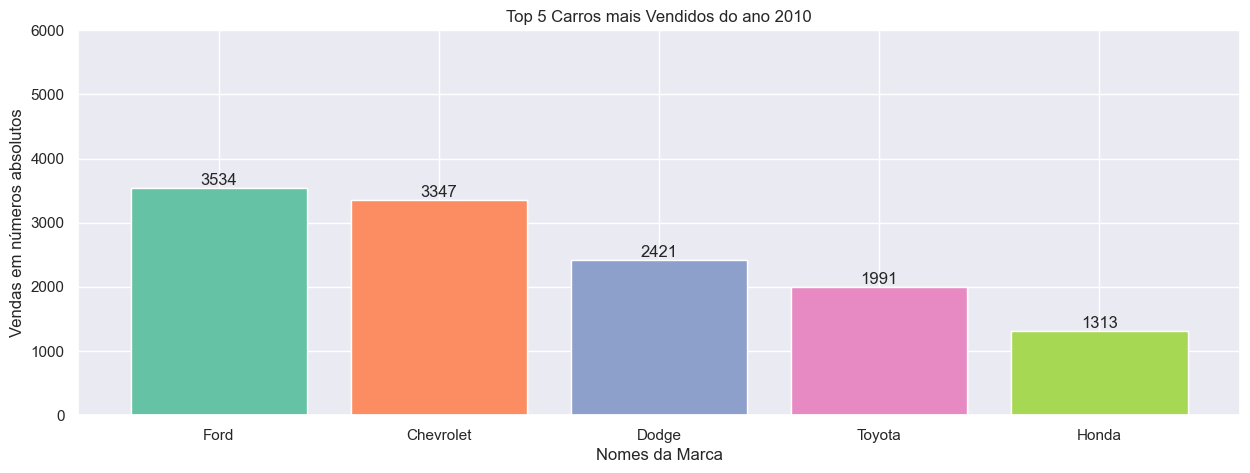

In [34]:
#Criando o gráfico com as 5 marcas de carro mais vendidas de 2010 usando a planilha filtrada

sns.set()

f, ax = plt.subplots(figsize = (15, 5))

ax.bar_label(ax.bar(num_vendidos.keys(), num_vendidos.values()), padding = 0.3)
ax.bar(num_vendidos.keys(), num_vendidos.values(), color = sns.mpl_palette("Set2"))
#sns.barplot(data = num_vendidos, x = num_vendidos.keys(), y = num_vendidos.values, color = sns.mlp_palette("Set2" ))
ax.set_title("Top 5 Carros mais Vendidos do ano 2010")
ax.set_xlabel("Nomes da Marca")
ax.set_ylabel("Vendas em números absolutos")
ax.set_ylim((0, 6000))

In [35]:
#Filtrando tanto pelo ano quanto pelo fabricante e armazenando em "carros_ford"

carros_ford = data.loc[(data['year']==2010)&(data['make'] == "Ford")]
carros_ford

,year,make,model,body,color,sellingprice,saledate
2646,2010,Ford,Focus,SEDAN,red,6100.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
2648,2010,Ford,F-150,REGULAR CAB,white,4100.0,Tue Dec 23 2014 13:00:00 GMT-0800 (PST)
2649,2010,Ford,F-250 Super Duty,SUPERCAB,white,8750.0,Tue Dec 16 2014 12:00:00 GMT-0800 (PST)
2668,2010,Ford,Expedition,SUV,black,18600.0,Wed Dec 17 2014 12:15:00 GMT-0800 (PST)
2669,2010,Ford,Focus,SEDAN,white,5400.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...
558059,2010,Ford,F-150,SUPERCAB,silver,16400.0,Fri Jun 19 2015 02:15:00 GMT-0700 (PDT)
558342,2010,Ford,F-150,SUPERCREW,black,13700.0,Fri Jun 19 2015 02:15:00 GMT-0700 (PDT)
558531,2010,Ford,Fusion,SEDAN,silver,7500.0,Fri Jun 19 2015 02:00:00 GMT-0700 (PDT)
558587,2010,Ford,F-150,SUPERCAB,orange,34250.0,Fri Jun 19 2015 02:00:00 GMT-0700 (PDT)


In [37]:
#Filtrando pelos 3 mais vendidos usando como parâmetro a coluna "body" (tipo de veículo)

num_vendidos_ford = dict(carros_ford.value_counts("body").head(3))
num_vendidos_ford 

{'SUPERCREW': np.int64(840), 'SUV': np.int64(793), 'SEDAN': np.int64(669)}

(0.0, 1000.0)

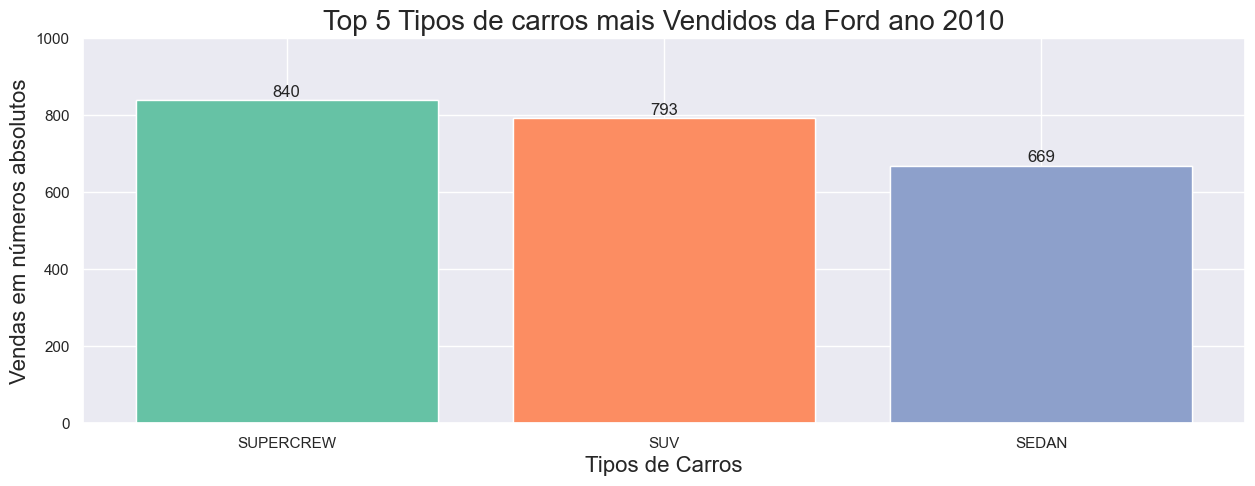

In [38]:
#Criando o gráfico com  com os top 3 'bodys' (tipo de carro) mais vendidos,
# da marca que foi a top 1 do gráfico anterior de 2010 usando a planilha filtrada


sns.set()

f, ax = plt.subplots(figsize = (15, 5))

ax.bar_label(ax.bar(num_vendidos_ford .keys(), num_vendidos_ford .values()), padding = 0.3)
ax.bar(num_vendidos_ford .keys(), num_vendidos_ford .values(), color = sns.mpl_palette("Set2"))
#sns.barplot(data = num_vendidos, x = num_vendidos.keys(), y = num_vendidos.values, color = sns.mlp_palette("Set2" ))
ax.set_title("Top 5 Tipos de carros mais Vendidos da Ford ano 2010", size = "20")
ax.set_xlabel("Tipos de Carros", size = "16")
ax.set_ylabel("Vendas em números absolutos", size = "16")
ax.set_ylim((0, 1000))